In [1]:
# Suppress warnings for cleaner outputs
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd

# Matplotlib configuration
import matplotlib
matplotlib.use('Agg')  # Ensuring compatibility in headless environments
import matplotlib.pyplot as plt
plt.switch_backend('Agg')

%matplotlib inline

import seaborn as sns

# Load the dataset
file_path = 'loan_data.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='mac_roman')

# Quick look at the data
print('Data loaded successfully. Here is the head of the dataframe:')
df.head()

Data loaded successfully. Here is the head of the dataframe:


,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [2]:
# Get information about the data types and non-null counts
print('Dataset information:')
df.info()

# Summary statistics for numeric columns
print('Summary statistics for numeric columns:')
display(df.describe())

# Check for missing values
print('Missing values in each column:')
display(df.isnull().sum())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB
Summary statistics for numeric columns:


,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000


Missing values in each column:


Text                 0
Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
dtype: int64

In [3]:
# Check for missing or null values and handle them
if df.isnull().sum().sum() > 0:
    # For simplicity, drop rows with missing values
    df = df.dropna()
    print('Dropped rows with missing values')
else:
    print('No missing values found.')

# Convert columns to appropriate data types if necessary
# In our dataset, numeric columns such as Income, Credit_Score, Loan_Amount, and DTI_Ratio should be numeric.
numeric_columns = ['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# The 'Approval' column is our target and is currently a string. Let's encode it to a numeric binary variable.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Approval_Label'] = le.fit_transform(df['Approval'])

# Optionally, encode other categorical columns (e.g., Employment_Status) using one-hot encoding
df = pd.get_dummies(df, columns=['Employment_Status'], drop_first=True)

print('Data cleaning and preprocessing completed.')
df.head()

No missing values found.
Data cleaning and preprocessing completed.


,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Approval,Approval_Label,Employment_Status_unemployed
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,Rejected,1,False
1,I want to make home improvements like installi...,197392,389,111604,22.14,Rejected,1,False
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,Rejected,1,False
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,Rejected,1,True
4,I need a loan to start a small business.,61853,732,19210,44.13,Approved,0,False


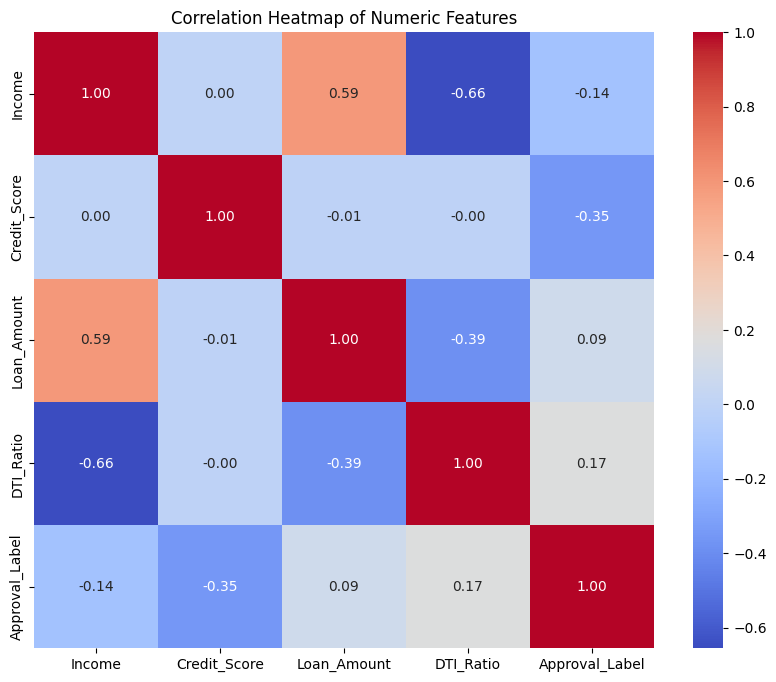

In [11]:
# Choose correlation method: "pearson", "spearman", or "kendall"
corr_method = "pearson"  # Options: "pearson", "spearman", "kendall"

# Validate method
if corr_method not in {"pearson", "spearman", "kendall"}:
    raise ValueError(f"Unsupported correlation method: {corr_method}")

# Visualize correlations among numeric variables (only if there are 4 or more numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr(method=corr_method)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')


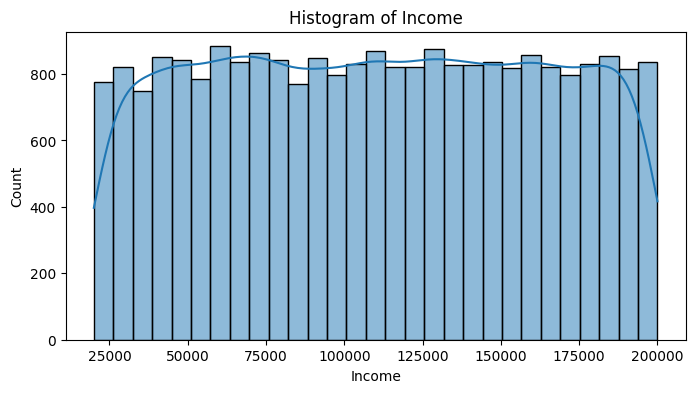

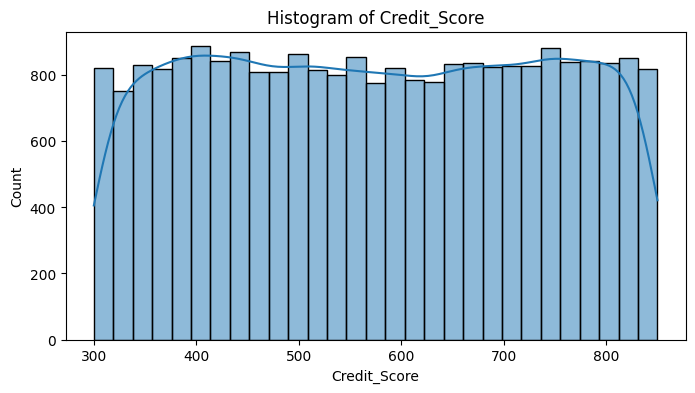

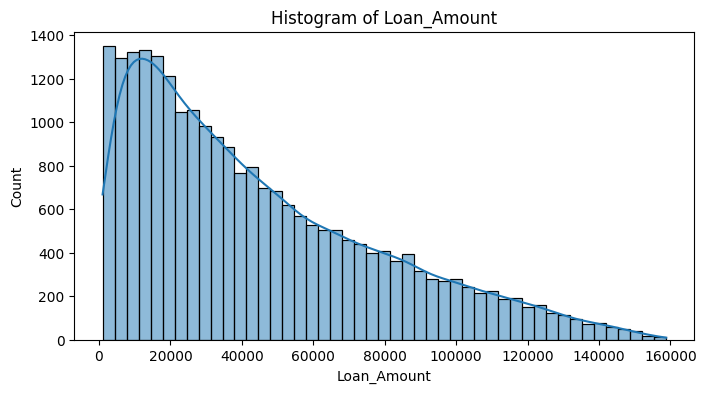

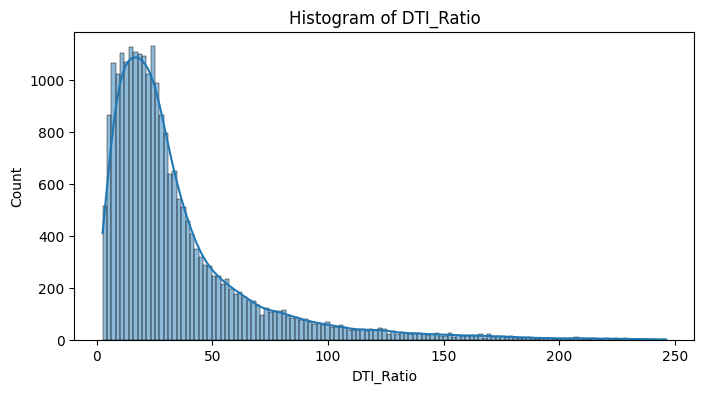

In [14]:
# Histograms for numeric features
numeric_features = ['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

# Box Plot for numeric features
# for feature in numeric_features:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(x=df[feature])
#     plt.title(f'Box Plot of {feature}')
#     plt.show()

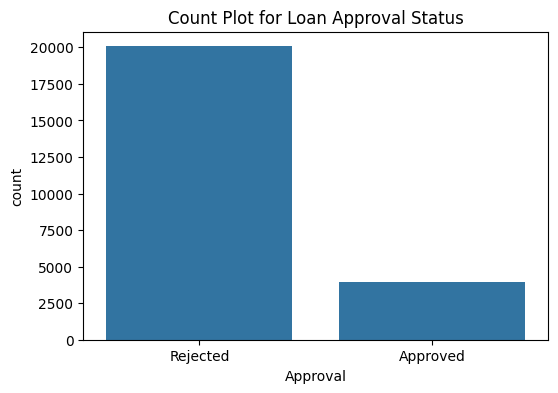

In [15]:
# Count plot (Pie Chart alternative) for the target variable 'Approval'
plt.figure(figsize=(6,4))
sns.countplot(x='Approval', data=df)
plt.title('Count Plot for Loan Approval Status')
plt.show()

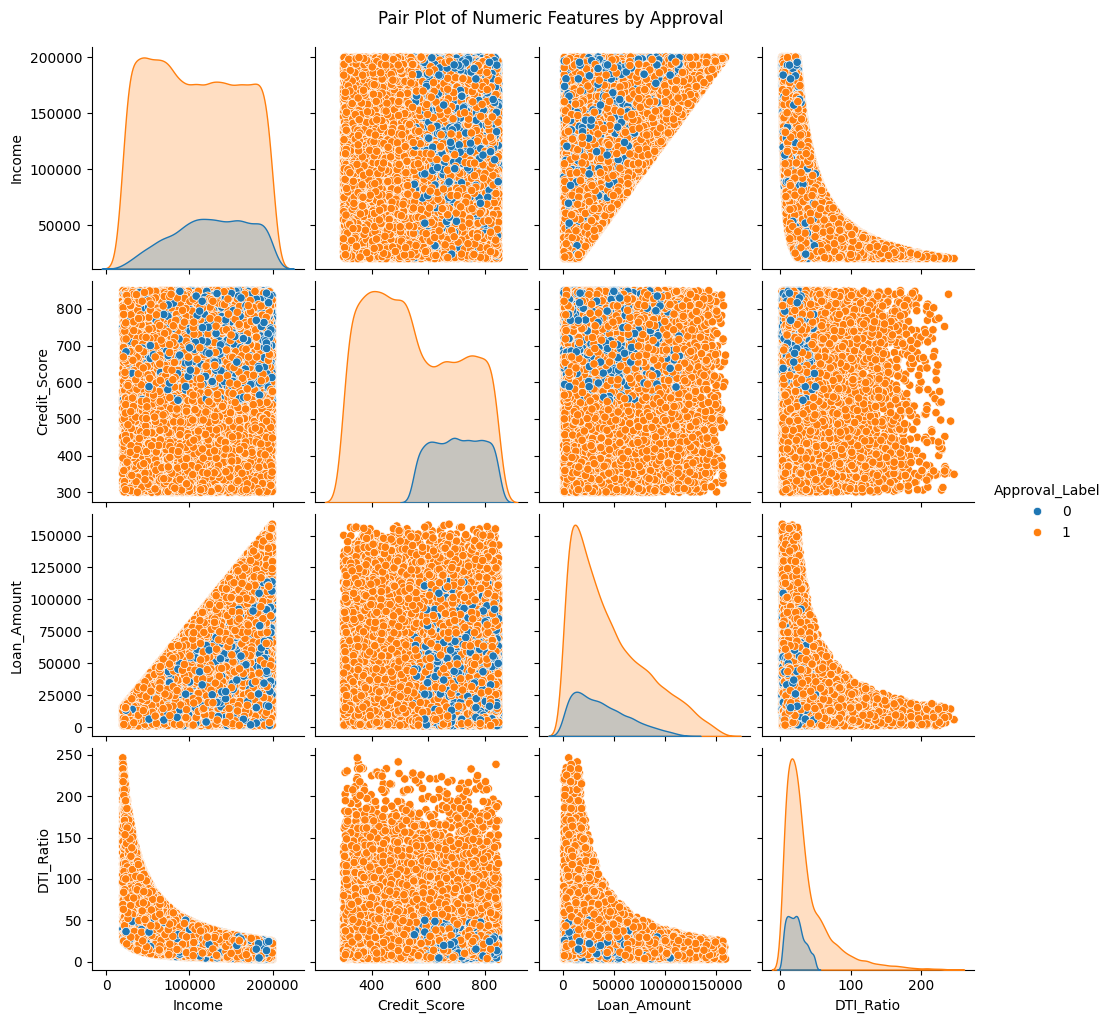

In [16]:
# Pair Plot of numeric features with hue as Approval_Label
sns.pairplot(numeric_df, hue='Approval_Label')
plt.suptitle('Pair Plot of Numeric Features by Approval', y=1.02)
plt.show()

In [ ]:
# Importing the necessary modules for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define feature matrix X and target vector y
# We drop columns that will not be used as predictors
drop_cols = ['Text', 'Approval', 'Approval_Label']
X = df.drop(columns=drop_cols)
y = df['Approval_Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy of the LOGREG model: 0.9303


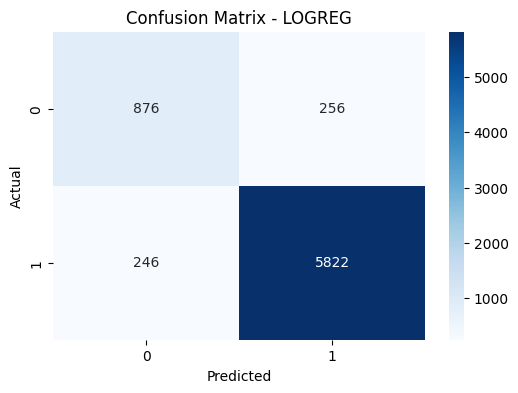

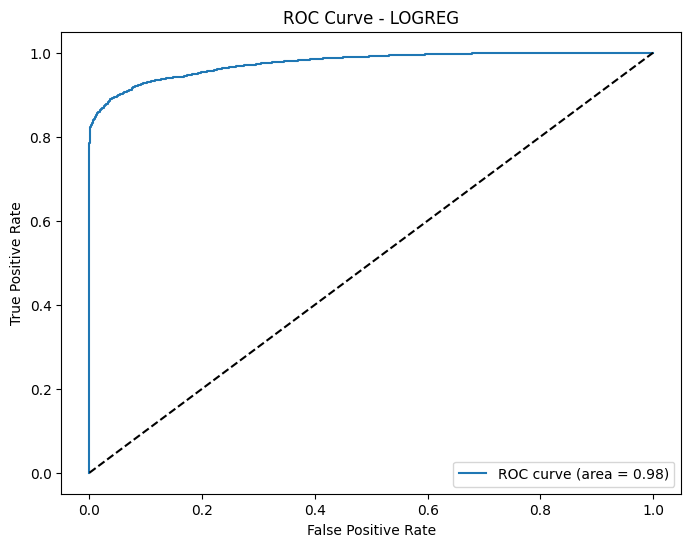

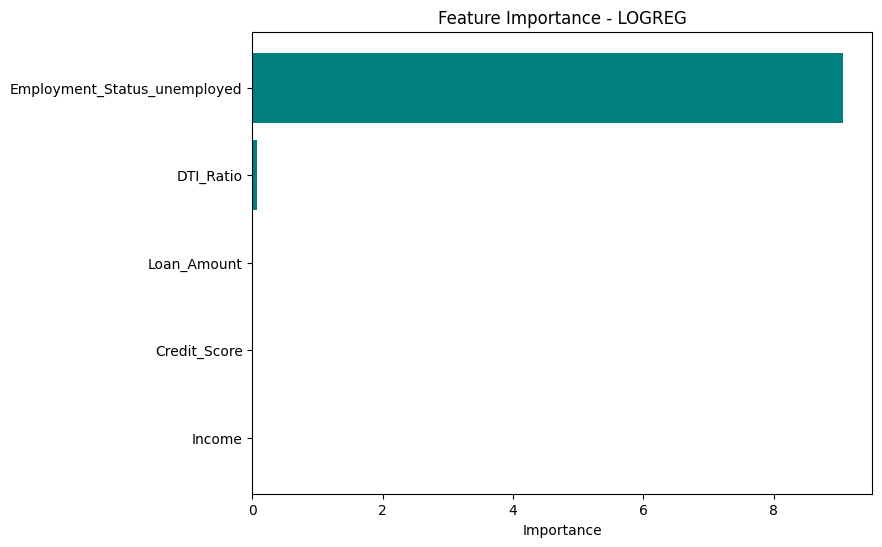

In [21]:
# Choose the model: "logreg", "svm", or "rf"
model_type = "logreg"  # change to "rf" or "logreg" as needed

if model_type == "logreg":
    model = LogisticRegression(max_iter=1000)
elif model_type == "svm":
    model = SVC(probability=True, kernel='rbf', C=1.0)  # probability=True enables predict_proba
elif model_type == "rf":
    model = RandomForestClassifier(n_estimators=100, random_state=42)
else:
    raise ValueError("Unsupported model type")

# Train the model
model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the {model_type.upper()} model: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_type.upper()}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test)[:, 1]
elif hasattr(model, "decision_function"):
    # For SVM without probability=True
    y_proba = model.decision_function(X_test)
else:
    raise RuntimeError("Model does not support probability estimates.")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {model_type.upper()}')
plt.legend(loc='lower right')
plt.show()

# Permutation Importance (basic visualization for interpretability)
if model_type == "logreg":
    importance = np.abs(model.coef_[0])
elif model_type == "rf":
    importance = model.feature_importances_
elif model_type == "svm":
    # SVM does not have feature importances directly; skip or use permutation_importance
    importance = np.abs(model.coef_[0]) if model.kernel == 'linear' else None

if importance is not None:
    feature_names = X.columns
    plt.figure(figsize=(8, 6))
    plt.barh(feature_names, importance, color='teal')
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {model_type.upper()}')
    plt.show()
else:
    print("Feature importance not available for non-linear SVM without permutation importance.")

In [22]:
# Randomly introduce missing values to numeric columns
def introduce_missingness(df, frac_missing=0.1, seed=42):
    np.random.seed(seed)
    df_missing = df.copy()
    numeric_cols = df_missing.select_dtypes(include=[np.number]).columns
    n_rows = df_missing.shape[0]
    for col in numeric_cols:
        missing_indices = np.random.choice(n_rows, size=int(frac_missing * n_rows), replace=False)
        df_missing.loc[missing_indices, col] = np.nan
    return df_missing

In [23]:
def handle_missing_values(df, method="drop", fill_value=None):
    """
    Handle missing values in a DataFrame.
    
    Parameters:
    - df: pd.DataFrame
    - method: str, one of:
        'drop'        – remove rows with any missing values
        'mean'        – fill with mean (numeric only)
        'median'      – fill with median (numeric only)
        'mode'        – fill with mode (applied column-wise)
        'constant'    – fill with a constant value (set `fill_value`)
        'ffill'       – forward fill
        'bfill'       – backward fill
    - fill_value: value to use for constant fill (if method == 'constant')
    
    Returns:
    - Cleaned DataFrame
    """
    if method == "drop":
        return df.dropna()
    elif method == "mean":
        return df.fillna(df.mean(numeric_only=True))
    elif method == "median":
        return df.fillna(df.median(numeric_only=True))
    elif method == "mode":
        return df.fillna(df.mode().iloc[0])
    elif method == "constant":
        if fill_value is None:
            raise ValueError("Must provide fill_value when method='constant'")
        return df.fillna(fill_value)
    elif method == "ffill":
        return df.fillna(method="ffill")
    elif method == "bfill":
        return df.fillna(method="bfill")
    else:
        raise ValueError(f"Unsupported method: {method}")

Accuracy of the LOGREG model: 0.9303


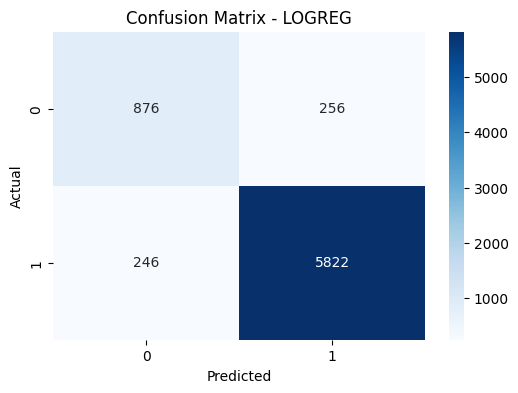

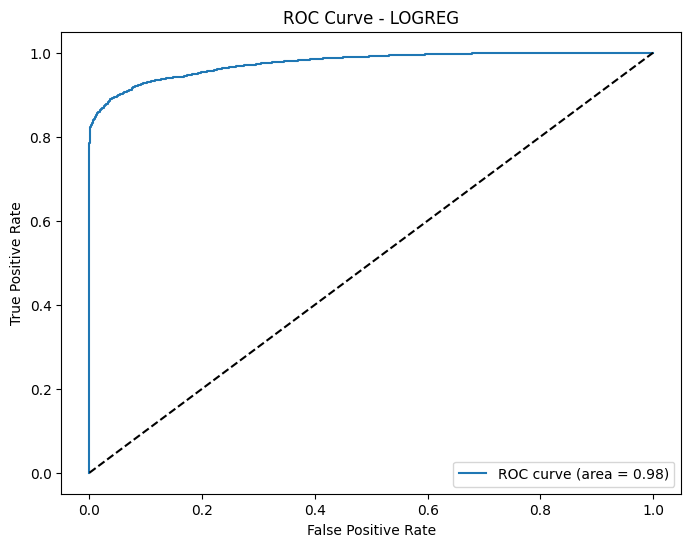

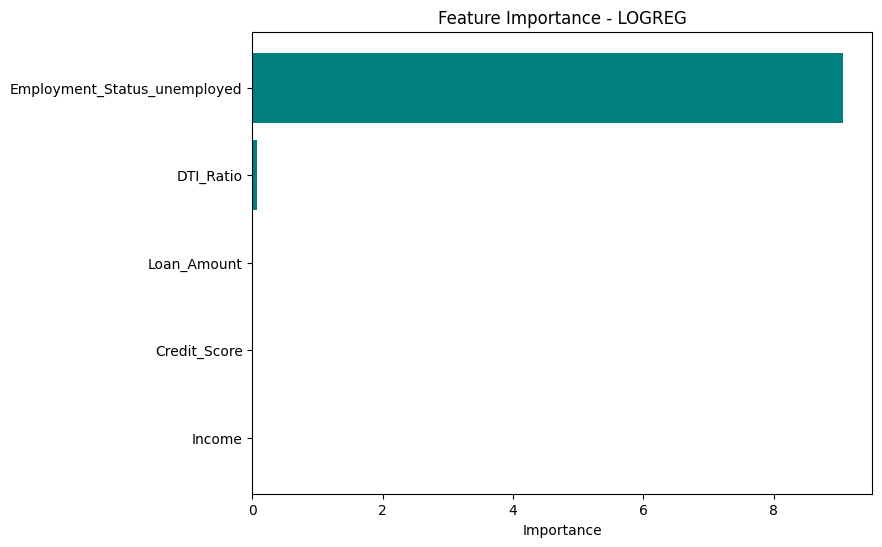

In [24]:
# Drop missing values
df_cleaned = handle_missing_values(df, method="drop")

# Train the model
model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the {model_type.upper()} model: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_type.upper()}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test)[:, 1]
elif hasattr(model, "decision_function"):
    # For SVM without probability=True
    y_proba = model.decision_function(X_test)
else:
    raise RuntimeError("Model does not support probability estimates.")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {model_type.upper()}')
plt.legend(loc='lower right')
plt.show()

# Permutation Importance (basic visualization for interpretability)
if model_type == "logreg":
    importance = np.abs(model.coef_[0])
elif model_type == "rf":
    importance = model.feature_importances_
elif model_type == "svm":
    # SVM does not have feature importances directly; skip or use permutation_importance
    importance = np.abs(model.coef_[0]) if model.kernel == 'linear' else None

if importance is not None:
    feature_names = X.columns
    plt.figure(figsize=(8, 6))
    plt.barh(feature_names, importance, color='teal')
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {model_type.upper()}')
    plt.show()
else:
    print("Feature importance not available for non-linear SVM without permutation importance.")

Accuracy of the LOGREG model: 0.9139


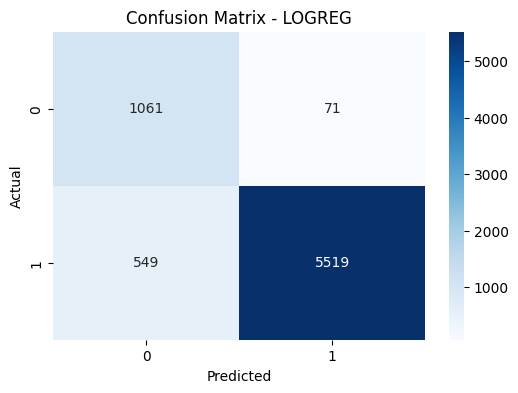

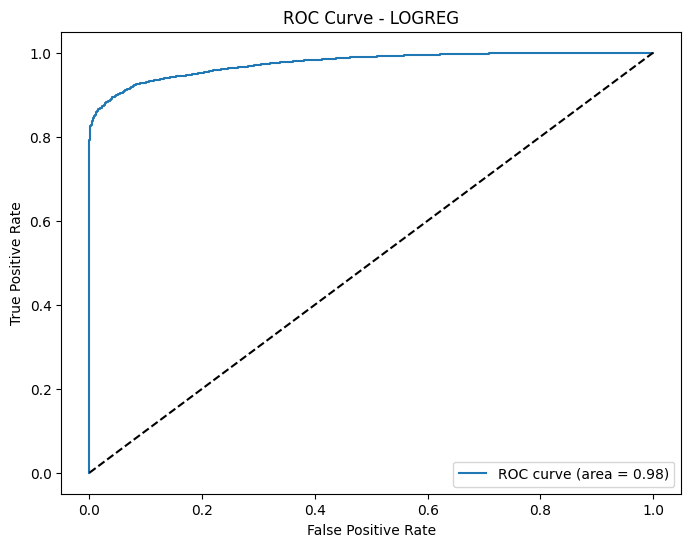

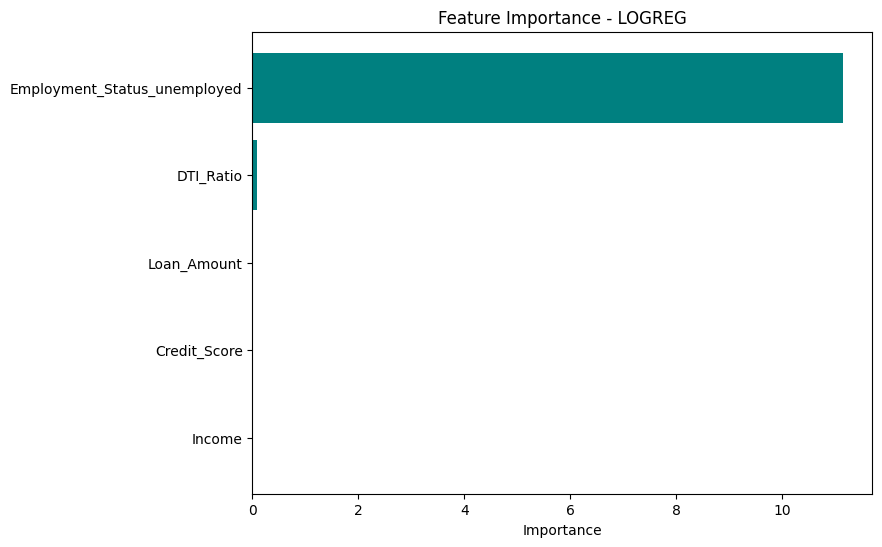

In [25]:
from imblearn.over_sampling import SMOTE

# SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

# Train the model
model.fit(X_res, y_res)

# Predictions and Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the {model_type.upper()} model: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_type.upper()}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test)[:, 1]
elif hasattr(model, "decision_function"):
    # For SVM without probability=True
    y_proba = model.decision_function(X_test)
else:
    raise RuntimeError("Model does not support probability estimates.")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {model_type.upper()}')
plt.legend(loc='lower right')
plt.show()

# Permutation Importance (basic visualization for interpretability)
if model_type == "logreg":
    importance = np.abs(model.coef_[0])
elif model_type == "rf":
    importance = model.feature_importances_
elif model_type == "svm":
    # SVM does not have feature importances directly; skip or use permutation_importance
    importance = np.abs(model.coef_[0]) if model.kernel == 'linear' else None

if importance is not None:
    feature_names = X.columns
    plt.figure(figsize=(8, 6))
    plt.barh(feature_names, importance, color='teal')
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {model_type.upper()}')
    plt.show()
else:
    print("Feature importance not available for non-linear SVM without permutation importance.")

In [ ]:
# Text tokening

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Example column: df["loan_reason"]
def clean_text(text):
    text = str(text).lower()                      # Lowercase
    text = re.sub(r'[^\w\s]', '', text)           # Remove punctuation
    text = re.sub(r'\d+', '', text)               # Remove numbers
    return text

df['Text_Clean'] = df['Text'].apply(clean_text)

# Bag of Words / TF-IDF (classical ML models)
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = tfidf.fit_transform(df['Text_Clean'])